In [1]:
%matplotlib inline

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from TFGDCANDECOMP import TFGDCANDECOMP
from TFADAMCANDECOMP import TFADAMCANDECOMP


In [3]:
def reconstitute2(s,A,B,C):
    return np.einsum('r,ir,jr,kr->ijk', s, A, B, C)

In [4]:
def reconstitute(A,B,C):
    return np.einsum('ir,jr,kr->ijk', A, B, C)

In [5]:
def calc_exact_acc(A_hat,B_hat,C_hat,A,B,C):
    M_hat = np.vstack([A_hat, B_hat, C_hat])
    M = np.vstack([A,B,C])
    print M_hat.shape
    print M.shape
    err, perm = utils.exact_factor_acc(M_hat, M)
    return err

In [5]:
A_true = np.random.randn(30,20)
B_true = np.random.randn(30,20)
C_true = np.random.randn(30,20)
X = np.einsum('ir,jr,kr->ijk', A_true, B_true, C_true)

In [304]:
import utils 
reload(utils)

<module 'utils' from 'utils.py'>

In [6]:
A_true = np.random.randn(10,5)
B_true = np.random.randn(10,5)
C_true = np.random.randn(10,5)
X = np.einsum('ir,jr,kr->ijk', A_true, B_true, C_true)

In [305]:
import NPGDCANDECOMP
reload(NPGDCANDECOMP)

<module 'NPGDCANDECOMP' from 'NPGDCANDECOMP.pyc'>

In [306]:
import NPALSCANDECOMP
reload(NPALSCANDECOMP)

<module 'NPALSCANDECOMP' from 'NPALSCANDECOMP.pyc'>

In [16]:
def unpack(d):
    return d["s"], d["A"], d["B"], d["C"], d["error_history"]

In [17]:
X = utils.NormalTensorComposition((10, 10, 10), 5)
for r in range(1, 10):
    s,A,B,C,_ = unpack(NPALSCANDECOMP.NPALSCANDECOMP(X, r))
    print("Approximating rank 5 with R = %d error: %g" % (r, utils.accuracy(X, r, s, A, B, C)))

Approximating rank 5 with R = 1 error: 0.497671
Approximating rank 5 with R = 2 error: 0.246219
Approximating rank 5 with R = 3 error: 0.179116
Approximating rank 5 with R = 4 error: 0.0928023
Approximating rank 5 with R = 5 error: 6.45667e-09
Approximating rank 5 with R = 6 error: 2.69982e-09
Approximating rank 5 with R = 7 error: 4.61092e-08
Approximating rank 5 with R = 8 error: 8.76198e-09
Approximating rank 5 with R = 9 error: 1.989e-07


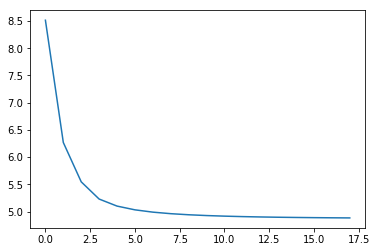

In [315]:
#fun sanity example
A = np.array([[1.0, 0.0], [2.0, 1.0], [1.0, 2.0]]).T
B = np.array([[0.0, 1.0], [2.0, 2.0], [1.0, 2.0]]).T
C = np.array([[1.0, 0.0], [0.0, 1.0], [2.0, 1.0]]).T
X = np.einsum('ir,jr,kr->ijk', A, B, C)
results = NPALSCANDECOMP.NPALSCANDECOMP(X, 3)
s_out, A_out, B_out, C_out, errors = unpack(results)
Y = np.einsum('r,ir,jr,kr->ijk', s_out, A_out, B_out, C_out)
error = utils.accuracy(X, 3, s_out, A_out, B_out, C_out)

results = utils.factor_acc_history(results, [A,B,C])
plt.plot(results["factor_error"])

[[False False False]
 [False False False]]


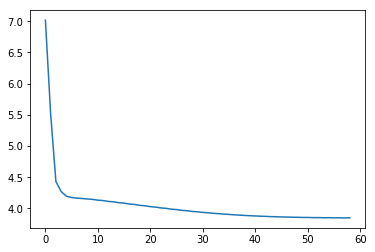

In [303]:
#fun sanity example
A = np.array([[1.0, 0.0], [2.0, 1.0], [1.0, 2.0]]).T
B = np.array([[0.0, 1.0], [2.0, 2.0], [1.0, 2.0]]).T
C = np.array([[1.0, 0.0], [0.0, 1.0], [2.0, 1.0]]).T
X = np.einsum('ir,jr,kr->ijk', A, B, C)
results1 = NPGDCANDECOMP.NPGDCANDECOMP(X, 3)
s_out, A_out, B_out, C_out, errors = unpack(results)
Y = np.einsum('r,ir,jr,kr->ijk', s_out, A_out, B_out, C_out)
error = utils.accuracy(X, 3, s_out, A_out, B_out, C_out)

factor_acc = utils.factor_acc_history(results, [A,B,C])
plt.plot(factor_acc)

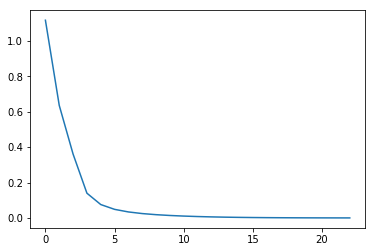

In [174]:
plt.plot(errors)

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


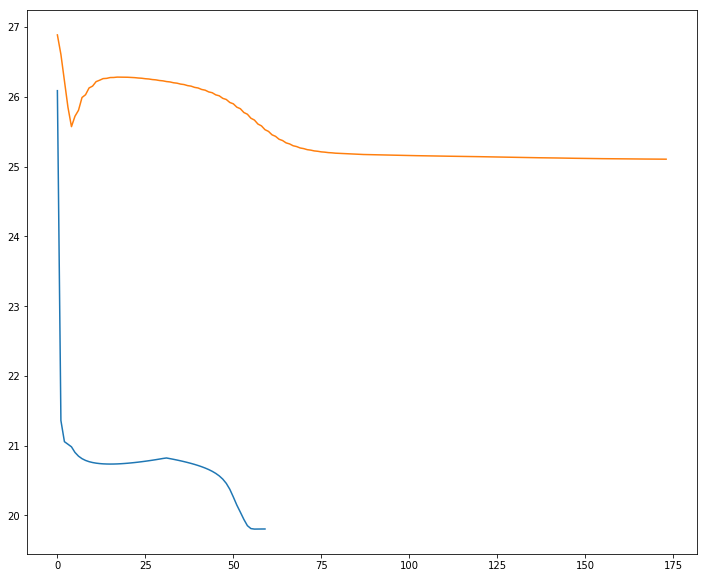

In [318]:
A = np.random.randn(10,5)
B = np.random.randn(10,5)
C = np.random.randn(10,5)
X = np.einsum('ir,jr,kr->ijk', A, B, C)
results1 = NPALSCANDECOMP.NPALSCANDECOMP(X, 5, tol=0.000001)
results1 = utils.factor_acc_history(results1, [A,B,C])
results2 = NPGDCANDECOMP.NPGDCANDECOMP(X, 5, tol=0.000001)
results2 = utils.factor_acc_history(results2, [A,B,C])
plt.figure(figsize=(12,10))
plt.plot(results1["factor_error"], label="NP ALS factor error")
plt.plot(results2["factor_error"], label="NP GD factor error")


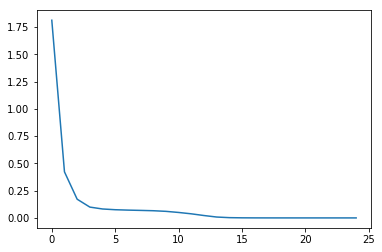

In [270]:
plt.plot(errors)

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


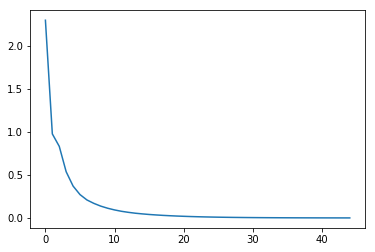

In [262]:
results = NPGDCANDECOMP.NPGDCANDECOMP(X, 5)
s_out, A_out, B_out, C_out, errors = unpack(results)
Y = np.einsum('r,ir,jr,kr->ijk', s_out, A_out, B_out, C_out)
error = utils.accuracy(X, 5, s_out, A_out, B_out, C_out)

factor_acc = utils.factor_acc_history(results, [A,B,C])
plt.plot(errors)

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


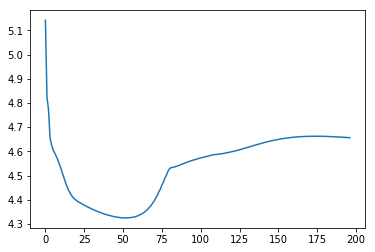

In [273]:
A = np.random.randn(10,5)
B = np.random.randn(10,5)
C = np.random.randn(10,5)
X = np.einsum('ir,jr,kr->ijk', A, B, C)
results = NPGDCANDECOMP.NPGDCANDECOMP(X, 5)
s_out, A_out, B_out, C_out, errors = unpack(results)
Y = np.einsum('r,ir,jr,kr->ijk', s_out, A_out, B_out, C_out)
error = utils.accuracy(X, 5, s_out, A_out, B_out, C_out)

factor_acc = utils.factor_acc_history(results, [A,B,C])
plt.plot(factor_acc)

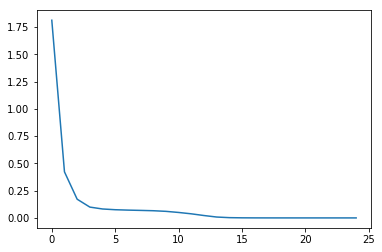

In [271]:
plt.plot(errors)

In [232]:
results["A_history"][0] == results["A_history"][-1]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

In [229]:
len(results["A_history"])

89

In [233]:
np.allclose(results["A_history"][0], results["A_history"][-1])

True

In [234]:
np.allclose(results["B_history"][0], results["B_history"][-1])

True

In [235]:
np.allclose(results["C_history"][0], results["C_history"][-1])

True

In [50]:
results["error_history"]

array([  1.25420941e+00,   9.22602873e-01,   1.65160897e-01,
         3.82933892e-02,   1.70975140e-02,   1.01451182e-02,
         6.79510790e-03,   4.97228159e-03,   3.78656282e-03,
         3.01201585e-03,   2.46023529e-03,   2.06988048e-03,
         1.77957513e-03,   1.56396284e-03,   1.39572443e-03,
         1.26314281e-03,   1.15272470e-03,   1.06014827e-03])

In [324]:
import plot_tensor
reload(plot_tensor)

<module 'plot_tensor' from 'plot_tensor.pyc'>

In [325]:
A = np.random.randn(10,4)
B = np.random.randn(10,4)
C = np.random.randn(10,4)
X = np.einsum('ir,jr,kr->ijk', A, B, C)

plot_tensor.tensor_heatmaps(X,A,B,C,4)

TypeError: NPGDCANDECOMP() got an unexpected keyword argument 'els'

In [198]:
results["A_history"]

[array([[  2.68680180e+00,  -5.19097314e-01,  -6.29754473e-01,
          -7.45712810e-01,   1.05649336e+00],
        [  8.26306631e-01,  -5.85860542e-01,   2.45451102e-01,
           4.17981868e-01,   4.72978441e-01],
        [ -8.87032792e-01,  -6.38814669e-01,   1.07091618e+00,
           6.22697372e-01,  -1.09043869e+00],
        [ -2.62015181e+00,  -5.76383255e-01,  -3.74369709e-01,
           1.81551503e-01,  -1.97204774e-01],
        [  3.76804993e+00,   5.62104094e-01,  -1.07966698e+00,
          -1.06840974e-02,  -1.58261316e-01],
        [ -1.60324352e+00,  -9.90154042e-01,  -2.31023843e-01,
           2.36150016e-02,   4.59312667e-01],
        [  2.31439147e+00,   3.27682659e-01,  -2.68738000e-01,
           7.06054552e-01,  -7.56866900e-01],
        [ -1.42384367e+00,  -2.94805937e-03,   9.06649492e-01,
           4.35240686e-01,  -4.81573642e-01],
        [  2.07362379e-01,  -2.15803075e+00,   3.64747250e-01,
          -6.62534290e-01,   5.80898526e-01],
        [  2.865272

In [ ]:

a_nrm = np.linalg.norm(A, ord = 2, axis = 0)
A /= a_nrm
b_nrm = np.linalg.norm(B, ord = 2, axis = 0)
B /= b_nrm
c_nrm = np.linalg.norm(C, ord = 2, axis = 0)
C /= c_nrm

In [46]:
A_out, B_out, C_out, errors, fac_errors = NPGDCANDECOMP.NPGDCANDECOMP(X,5, ELS=False,true=[A_true, B_true, C_true])
print(errors[-1]) 

Tolerance limit reached, stopping!
4612.85325115


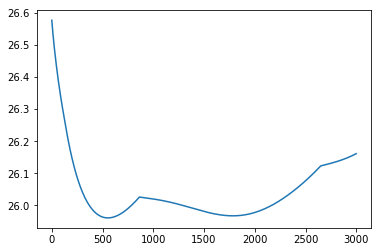

In [47]:
plt.plot(fac_errors)

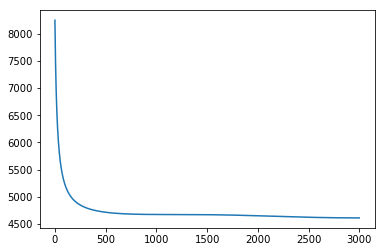

In [48]:
plt.plot(errors)

In [42]:
calc_exact_acc(A_out, B_out, C_out, A_true, B_true, C_true)

(30, 5)
(30, 5)


26.272897967475743

In [51]:
A_out, B_out, C_out, errors, fac_errors = NPALSCANDECOMP.NPALSCANDECOMP(X,5,true=[A_true, B_true, C_true])
print(errors[-1])

Tolerance limit reached, stopping!
3.97991630113e-07


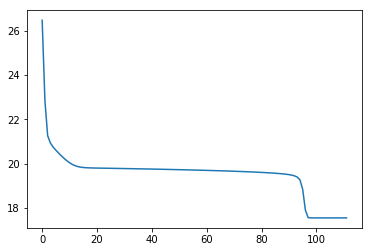

In [52]:
plt.plot(fac_errors)

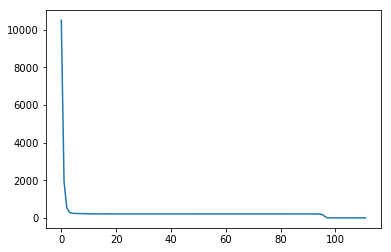

In [53]:
plt.plot(errors)

In [138]:
calc_exact_acc(A_out, B_out, C_out, A_true, B_true, C_true)

(30, 5)
(30, 5)
[(0, 1, 2, 3, 4), (0, 1, 2, 4, 3), (0, 1, 3, 2, 4), (0, 1, 3, 4, 2), (0, 1, 4, 2, 3), (0, 1, 4, 3, 2), (0, 2, 1, 3, 4), (0, 2, 1, 4, 3), (0, 2, 3, 1, 4), (0, 2, 3, 4, 1), (0, 2, 4, 1, 3), (0, 2, 4, 3, 1), (0, 3, 1, 2, 4), (0, 3, 1, 4, 2), (0, 3, 2, 1, 4), (0, 3, 2, 4, 1), (0, 3, 4, 1, 2), (0, 3, 4, 2, 1), (0, 4, 1, 2, 3), (0, 4, 1, 3, 2), (0, 4, 2, 1, 3), (0, 4, 2, 3, 1), (0, 4, 3, 1, 2), (0, 4, 3, 2, 1), (1, 0, 2, 3, 4), (1, 0, 2, 4, 3), (1, 0, 3, 2, 4), (1, 0, 3, 4, 2), (1, 0, 4, 2, 3), (1, 0, 4, 3, 2), (1, 2, 0, 3, 4), (1, 2, 0, 4, 3), (1, 2, 3, 0, 4), (1, 2, 3, 4, 0), (1, 2, 4, 0, 3), (1, 2, 4, 3, 0), (1, 3, 0, 2, 4), (1, 3, 0, 4, 2), (1, 3, 2, 0, 4), (1, 3, 2, 4, 0), (1, 3, 4, 0, 2), (1, 3, 4, 2, 0), (1, 4, 0, 2, 3), (1, 4, 0, 3, 2), (1, 4, 2, 0, 3), (1, 4, 2, 3, 0), (1, 4, 3, 0, 2), (1, 4, 3, 2, 0), (2, 0, 1, 3, 4), (2, 0, 1, 4, 3), (2, 0, 3, 1, 4), (2, 0, 3, 4, 1), (2, 0, 4, 1, 3), (2, 0, 4, 3, 1), (2, 1, 0, 3, 4), (2, 1, 0, 4, 3), (2, 1, 3, 0, 4), (2, 1, 3, 4, 0

21.009391804611209

In [89]:
s, A_out, B_out, C_out, errors = TFGDCANDECOMP(X,5)
print(errors[-1])
print(len(errors))

12.7811100337
5001


In [37]:
Y=reconstitute(A_out,B_out,C_out)

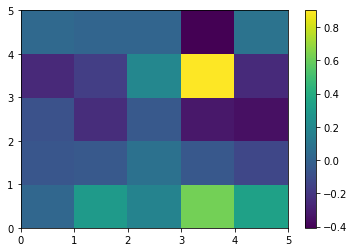

In [38]:
plt.pcolor(Y[0])
plt.colorbar()

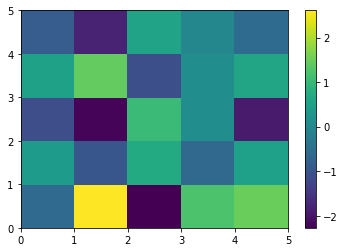

In [39]:
plt.pcolor(X[0])
plt.colorbar()

In [229]:
X.shape

(30, 30, 30)

In [214]:
KR(A_true,B_true).shape

(900, 20)

In [29]:
import NPALSCANDECOMP
reload(NPALSCANDECOMP)

<module 'NPALSCANDECOMP' from 'NPALSCANDECOMP.py'>

In [30]:
A_out, B_out, C_out, errors = NPALSCANDECOMP.NPALSCANDECOMP(X,20)

Tolerance limit reached, stopping!
(30, 20)
(30, 20)
(30, 20)
(252,)


In [31]:
Y=reconstitute(A_out,B_out,C_out)

In [32]:
np.linalg.norm(X-Y)**2

1.6843208485592189e-07

In [33]:
Y

array([[[  4.35787121e-01,   5.90720454e-02,  -5.68480643e+00, ...,
          -4.24075446e+00,   6.12827858e-01,   6.27079712e+00],
        [  4.83034702e+00,  -6.35831311e+00,   7.41252166e+00, ...,
           5.16621404e+00,   5.83338205e+00,   2.05042956e+00],
        [  3.08351847e+00,   1.75132811e+00,   3.03047367e+00, ...,
          -2.50805555e+00,  -3.10302642e+00,   1.26325176e+00],
        ..., 
        [ -2.92637821e+00,   3.33376265e+00,   3.56390649e+00, ...,
          -5.55187555e+00,  -4.25966649e+00,   7.79046678e+00],
        [ -4.14273493e+00,   4.88181187e+00,   3.64777481e+00, ...,
          -4.82346342e-01,  -2.27306284e-01,   8.35526557e+00],
        [ -3.74353910e+00,  -1.80637425e-01,   8.36404497e+00, ...,
           1.01714157e-01,   1.02442537e+00,  -2.52225341e+00]],

       [[ -3.11992746e+00,   1.44441559e+00,   8.73098594e+00, ...,
          -3.56499639e+00,   3.46308450e+00,   7.43277533e-01],
        [ -7.94961704e-01,   2.19824092e-01,  -3.62732993e+0

In [34]:
X

array([[[  4.35784054e-01,   5.90740550e-02,  -5.68480767e+00, ...,
          -4.24075639e+00,   6.12827039e-01,   6.27079791e+00],
        [  4.83034845e+00,  -6.35831011e+00,   7.41252203e+00, ...,
           5.16621700e+00,   5.83338246e+00,   2.05043057e+00],
        [  3.08351843e+00,   1.75132942e+00,   3.03047269e+00, ...,
          -2.50805458e+00,  -3.10302610e+00,   1.26325330e+00],
        ..., 
        [ -2.92638348e+00,   3.33375770e+00,   3.56391289e+00, ...,
          -5.55187464e+00,  -4.25966622e+00,   7.79045946e+00],
        [ -4.14273483e+00,   4.88181592e+00,   3.64777527e+00, ...,
          -4.82346819e-01,  -2.27305799e-01,   8.35526701e+00],
        [ -3.74353748e+00,  -1.80636081e-01,   8.36404730e+00, ...,
           1.01716600e-01,   1.02442535e+00,  -2.52225420e+00]],

       [[ -3.11992709e+00,   1.44441876e+00,   8.73098514e+00, ...,
          -3.56499906e+00,   3.46308480e+00,   7.43278195e-01],
        [ -7.94962526e-01,   2.19823977e-01,  -3.62733125e+0

In [35]:
errors

array([  1.09389732e+06,   3.51654110e+05,   2.08508525e+05,
         1.38039902e+05,   9.36349729e+04,   4.25886116e+04,
         2.24950904e+04,   2.01766665e+04,   1.99777987e+04,
         1.99269766e+04,   1.98493491e+04,   1.96632582e+04,
         1.91773407e+04,   1.80912040e+04,   1.60698819e+04,
         1.21742823e+04,   8.48053461e+03,   7.49397962e+03,
         7.37515018e+03,   7.35761344e+03,   7.35416201e+03,
         7.35340387e+03,   7.35321684e+03,   7.35315535e+03,
         7.35312171e+03,   7.35309414e+03,   7.35306777e+03,
         7.35304151e+03,   7.35301509e+03,   7.35298847e+03,
         7.35296163e+03,   7.35293457e+03,   7.35290727e+03,
         7.35287974e+03,   7.35285198e+03,   7.35282398e+03,
         7.35279574e+03,   7.35276725e+03,   7.35273852e+03,
         7.35270953e+03,   7.35268029e+03,   7.35265079e+03,
         7.35262103e+03,   7.35259101e+03,   7.35256072e+03,
         7.35253015e+03,   7.35249931e+03,   7.35246820e+03,
         7.35243679e+03,

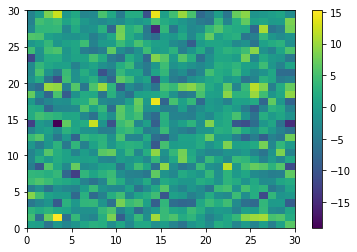

In [39]:
plt.pcolor(Y[0])
plt.colorbar()

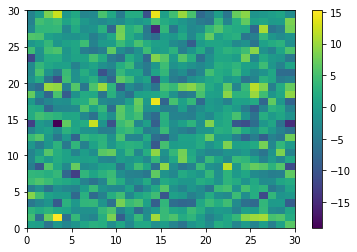

In [40]:
plt.pcolor(X[0])
plt.colorbar()

In [22]:
A_out

array([[  8.71376168e-01,  -1.28795511e+00,  -2.13955365e+00,
          3.10090352e+00,  -7.75869646e-01,  -2.96083228e+00,
         -5.99830262e-01,  -1.79376168e+00,   1.62200184e+00,
          3.79919711e+00,  -3.47944772e+00,  -2.46999360e+00,
          4.89780099e+00,   1.23735714e+00,  -4.18911383e+00,
         -1.34008323e+00,   1.60204556e-01,  -2.10367884e+00,
         -6.63316918e-01,   2.09367796e+00],
       [ -1.22944620e+00,  -1.45353820e+00,   4.09799972e+00,
         -1.47917800e+00,  -2.46974802e-02,  -2.13040965e+00,
         -3.61849434e+00,  -1.13212707e+00,   3.29540638e+00,
          8.07984795e-01,   1.42832866e+00,  -6.21039923e+00,
         -1.71746582e+00,   1.59983788e+00,  -6.56486267e-01,
          1.16088546e+00,   2.91616888e+00,  -1.92535563e-01,
          7.16443348e-01,  -1.80099126e+00],
       [ -6.37062582e-01,   1.16440680e+00,   1.42526908e+00,
          2.68859419e+00,  -4.77738972e+00,   2.12361913e+00,
          4.95745801e-01,  -9.25123572e-01

In [23]:
A_true

array([[ -1.27449405e+00,   1.55650322e+00,   6.04629389e-01,
          2.83133405e-01,   7.55938160e-01,  -6.05414359e-02,
          4.21754302e-01,   6.28000503e-01,   1.17532982e+00,
         -2.80721712e-01,   6.66794821e-01,   1.15582350e+00,
         -1.95694977e+00,  -1.57442882e+00,  -6.20594496e-01,
         -1.19849118e+00,  -1.23942344e+00,  -7.04681059e-01,
         -1.02627713e+00,   1.03735130e+00],
       [ -9.17037421e-01,   2.43923338e-01,  -8.53086664e-01,
          1.70801092e+00,   1.53583382e+00,  -1.10202151e+00,
         -4.55537033e-01,   8.11971851e-01,   2.95517657e+00,
         -8.93602585e-03,   7.52519880e-01,  -5.51345903e-01,
          6.86225356e-01,   6.46310005e-01,  -3.91686243e-01,
          2.29553386e+00,  -1.13435906e-01,   6.06169834e-01,
         -2.18260221e-01,  -8.98635003e-01],
       [  9.14114593e-01,  -7.03233324e-01,  -4.42044262e-01,
         -2.34003107e-01,  -1.39984394e+00,   7.63973952e-01,
          5.08730713e-02,  -5.92136667e-01

In [24]:
B_out


array([[ 0.21225001, -0.06696581, -0.18671418, -0.40199592,  0.31465687,
         0.07938863, -0.22543001, -0.00758439,  0.11868475,  0.02986002,
        -0.10712301, -0.19140171, -0.0488184 , -0.03759145, -0.05099299,
        -0.17519412, -0.10316802, -0.02398439, -0.27872936, -0.30067213],
       [ 0.0887979 , -0.06912833,  0.17315763, -0.07636314, -0.01338417,
         0.0631729 ,  0.19299313,  0.07610312, -0.25556888,  0.08424574,
         0.2800059 , -0.01292707, -0.13718501,  0.27922159,  0.16494134,
         0.03200295,  0.07534113,  0.03775568,  0.33884701, -0.00795776],
       [-0.23003953, -0.31143374,  0.29730457,  0.21484087, -0.01614364,
         0.08899124,  0.43421109,  0.09265768, -0.25161983,  0.04445887,
        -0.15690425, -0.00844533, -0.03530339,  0.26020733, -0.0409665 ,
        -0.26396207, -0.05566236, -0.09164407,  0.009647  ,  0.09415969],
       [ 0.19729906,  0.16048737,  0.17462911, -0.21769678,  0.25358613,
        -0.14982411, -0.57751232, -0.14850527,  

In [26]:
B_true

array([[-0.51293914,  0.39025992,  0.58810902, -0.87325651,  0.95152997,
         0.62003769,  0.97349767,  0.18278653,  0.99964066, -1.76539559,
         0.29584186,  1.74552554, -0.24951214, -0.83073001,  0.07133542,
        -0.71132595,  0.20874514,  1.77623459, -0.32923641, -0.90105981],
       [-0.40816752, -1.26233063,  0.24604388,  0.74760451, -2.04897006,
        -0.45279864, -1.1834625 , -1.3576969 ,  0.06751488,  0.07509239,
         0.30539528,  0.33157977, -0.70115198,  2.17142247, -0.71578911,
         0.65967942, -0.32860212,  0.04701054, -0.92892032,  0.16459742],
       [-0.5749829 ,  0.31352498, -0.63740053,  1.68201943, -2.01730985,
         0.33452976, -0.03369153, -1.26524109,  0.04410776,  0.09057418,
         1.37585288, -0.9328705 , -0.18043582, -1.21677935, -0.87149308,
         1.13264278,  0.79761242, -0.55625274, -0.49021395, -1.35761189],
       [ 0.96803126,  1.34549728,  0.54668229, -2.23713064,  0.54351085,
        -0.4524811 , -0.17159051,  1.63319987,  

In [25]:
C_true

array([[ -7.84740054e-01,  -1.60793321e+00,   5.78929350e-01,
          5.67368526e-01,   2.26332146e-01,   1.30651493e+00,
          5.39398264e-01,   4.65919460e-01,   7.48995822e-03,
         -3.64312132e-01,   5.03840353e-01,  -2.42272047e-01,
          6.62317491e-01,  -5.08941942e-01,   2.61324238e+00,
         -7.25344509e-01,  -2.13299442e+00,  -1.40865449e+00,
         -5.71138361e-01,  -1.05555632e+00],
       [  5.74957859e-01,  -8.30817441e-01,   2.55479305e-01,
          1.10626071e+00,   8.59747273e-01,   1.48871632e-01,
          2.98055462e+00,   7.15408530e-01,   4.27338589e-01,
         -9.52617120e-01,   2.70753930e-02,  -8.63324613e-01,
         -5.22876349e-01,   1.16016178e+00,   9.04541189e-02,
         -1.07081080e+00,  -1.93763848e-01,  -5.05683977e-01,
         -1.14789182e+00,   5.15795371e-01],
       [  7.06301153e-01,  -9.81229497e-01,   7.91105907e-01,
         -4.00881632e-02,   2.92003209e-01,   1.03947997e+00,
         -1.01551687e-01,  -8.12666893e-01

In [27]:
C_out

array([[  1.11306159e+00,   1.15236692e+00,  -1.54791660e+00,
          3.92113154e-01,   7.39545642e-01,   2.18251612e+00,
         -1.03742836e+00,  -8.50365191e+00,   8.45686439e-01,
         -1.70113791e+00,  -1.78590416e+00,   1.86137936e-02,
         -1.35254186e+00,  -1.14981931e+00,  -4.57234954e+00,
          4.20251688e+00,   2.96732341e+00,   1.09374936e+01,
          1.19785338e+00,  -2.80087841e+00],
       [  4.91190658e-01,   6.19259094e-02,  -2.28515646e+00,
          1.39727570e+00,   1.93379218e+00,  -1.59907101e+00,
         -2.02278782e+00,  -2.94343643e-01,   3.21243086e+00,
         -3.41897985e+00,   4.07106846e+00,   1.06202420e+00,
          1.06778343e+00,  -1.76552084e+00,  -2.36252934e+00,
         -2.05355174e+00,   3.38113293e-01,   9.93574423e-01,
          6.61896584e+00,  -1.00546838e+00],
       [  1.52099713e+00,   3.45011963e+00,  -4.97644542e+00,
          1.88516106e+00,   1.20865001e+00,  -1.96436269e+00,
          7.33008846e-02,   1.10283369e+01

## Reconstruction error 

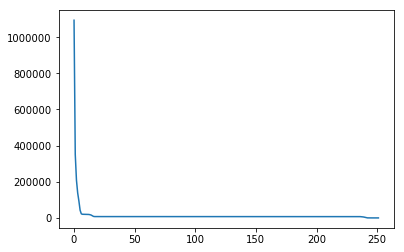

In [42]:
plt.plot(np.arange(len(errors[:1000])), errors[:1000])

In [192]:
x = np.random.randn(5,5,5)
y = np.random.randn(5,5,5)
z = np.linalg.norm(x-y)
print z

15.6544623223


In [185]:
errors[20:50]

array([ 0.34027331,  0.34275975,  0.34387215,  0.34467118,  0.34518312,
        0.34504741,  0.34534157,  0.34521119,  0.34540749,  0.34531679,
        0.34522912,  0.3453987 ,  0.34510431,  0.34525209,  0.34543887,
        0.34507937,  0.34536944,  0.345174  ,  0.34544794,  0.3453643 ,
        0.34512378,  0.34548687,  0.34490133,  0.34546721,  0.34526454,
        0.34540801,  0.34502975,  0.34524664,  0.34543309,  0.34515408])

In [53]:
s, A_out, B_out, C_out, errors=TFGDCANDECOMP(X, 2)
print(errors[-1])

4.37427530257


In [100]:
a = np.random.randn(3,3)
b = np.random.randn(3,3)
c = np.random.randn(3,3)

In [101]:
d = np.vstack([a,b,c])

In [113]:
a = np.random.randn(3,3,3)

In [45]:
x = np.array([[2,3,4],[8,3,2]])

In [46]:
x

array([[2, 3, 4],
       [8, 3, 2]])

In [47]:
x[:,[2,1,0]]

array([[4, 3, 2],
       [2, 3, 8]])

In [117]:
a[0,:,:]

array([[ 0.33477577,  0.73516376, -0.4998847 ],
       [-0.46269137, -0.15099122, -0.84064781],
       [ 0.14611607, -1.4009178 ,  1.04538776]])

In [114]:
a

array([[[ 0.33477577,  0.73516376, -0.4998847 ],
        [-0.46269137, -0.15099122, -0.84064781],
        [ 0.14611607, -1.4009178 ,  1.04538776]],

       [[ 1.77997843,  0.23833368,  1.19748234],
        [ 1.78604912,  0.79989029,  0.28435161],
        [ 0.32870673,  0.26786826, -1.11254461]],

       [[ 0.9083464 ,  0.60232589, -0.76276641],
        [ 0.26520348, -1.16181628, -0.84963512],
        [-0.99977988, -1.31406384,  0.24580542]]])

In [115]:
a[:,0,:]

array([[ 0.33477577,  0.73516376, -0.4998847 ],
       [ 1.77997843,  0.23833368,  1.19748234],
       [ 0.9083464 ,  0.60232589, -0.76276641]])

In [116]:
a[:,0,:].T

array([[ 0.33477577,  1.77997843,  0.9083464 ],
       [ 0.73516376,  0.23833368,  0.60232589],
       [-0.4998847 ,  1.19748234, -0.76276641]])

In [104]:
b

array([[-0.70877709,  0.76538051,  0.99385503],
       [ 0.58481432, -0.00554075, -0.66315536],
       [ 1.45840143, -0.34103246,  0.1728013 ]])

In [102]:
d

array([[-0.15107711, -0.83603289, -0.62147123],
       [ 0.37180529, -0.0428617 , -0.61938033],
       [ 0.90780905, -0.69124978,  0.34590339],
       [-0.70877709,  0.76538051,  0.99385503],
       [ 0.58481432, -0.00554075, -0.66315536],
       [ 1.45840143, -0.34103246,  0.1728013 ],
       [ 0.40902105, -1.26763347, -1.06252867],
       [ 0.77206898,  0.97532266,  1.37732756],
       [-0.05149544,  0.17028907,  0.16058295]])

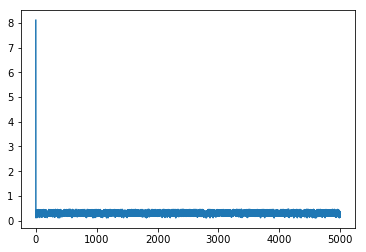

In [48]:
plt.plot(np.arange(len(errors)), errors)

In [186]:
s, A_out, B_out, C_out, errors=TFGDCANDECOMP(X, 3)
print(errors[-1])

0.88613576748


In [187]:
s, A_out, B_out, C_out, errors=TFADAMCANDECOMP(X, 3)
print(errors[-1])

0.555491501916
